In [ ]:
# Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSafNIcpUOz5AvPzM5MXxHrBSxqOS4jPiGp0FDXAuiFp51DaRiSeV5nY46CFa5VaPKjkgv2zfsUL7Sn/pub?output=csv'
X = pd.read_csv(url)
X = X.values

In [ ]:
# Implementación K-Means Manual

import random

# Definimos la distancia euclídea
def distancia_euclidiana(x, c):
    return np.sqrt(np.sum((x - c)**2))

# variable de inicializacion
k = 4 # número de cluster
dimension = X.shape[0] # núero de puntos
centroids = X[random.sample(range(dimension), k)] # Centroides iniciales
centroids

# Almacenamiento de etiquetas
clusters_manuales = np.zeros(dimension)

# Almacenamiento de distancias
distancias = np.zeros((dimension,k))

# Implementación del método
tol = 1e-6
error = 100

# Repetir hats que los centroides dejen de moverse seiginificativamente
while error > tol:

    # Calcular las distancias de cada punto a cada centroide
    for i in range(dimension):
      for j in range(k):
        distancias[i,j] = distancia_euclidiana(X[i], centroids[j])
      clusters_manuales[i] = np.argmin(distancias[i])

    # Almacenar los centroids previos antes de actualizarlos
    centroids_previos = np.copy(centroids)

    # Actualizar los centroides
    for l in range(k): # Iteramos sobre los clusters (k=4)
        puntos_cluster = X[clusters_manuales == l]
        # Si el cluster no está vacio, recalcular el centroide.
        if len(puntos_cluster) > 0:
            centroids[l] = np.mean(puntos_cluster, axis=0) # Promedia los puntos que pertenecen al cluster, columna por columna.
        else:
          print(f'cluster {l} vacio, reasignando centroide aleatoriamente')
          centroids[l] = X[random.choice(range(dimension))]
    # Calcular el error como el cambio en los centroides
    error = np.mean([distancia_euclidiana(centroids[l], centroids_previos[l]) for l in range(k)])
    print(error)

67.97708563057427
36.803779145981004
20.8466808641776
5.725876185507643
3.1567206229875744
1.8952902087140595
1.1545119420097338
0.7686345870475052
0.5578260756395814
0.33346631116306114
0.2270014936831813
0.20953431520330315
0.12396681756142901
0.06939067334415622
0.040668255598534014
0.049040677500188215
0.05147752462929396
0.033143729701198436
0.020109398013983502
0.014388315301009025
0.0


In [ ]:
# Definimos las librerías
from sklearn.decomposition import PCA

# Crear un objeto PCA y ajustar los datos de las tres principales componentes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [ ]:
# Verificamos la varianza de los datos
varianza = pca.explained_variance_ratio_
print(sum(varianza))

0.8397093998660171


In [ ]:
clusters_manuales

array([0., 2., 2., ..., 0., 3., 0.])

In [ ]:
# Actualización de los centroides con PCA

centroids = np.array(centroids)
centroids = pca.transform(centroids)

In [ ]:
# Definimos la función de gráfica de clusters y centroides 2D

def graficar_clusters_PCA2D(clusters, metodo, centroids):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                    hue=clusters, palette='deep',
                    alpha=0.6, s = 100)
    plt.scatter(centroids[:,0], centroids[:,1], c= 'black', s = 100, label = 'centroides')
    plt.title(f'Visualización 2D de la Clusterización (PCA) {metodo}', fontsize=16)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.grid(linestyle = '-', alpha  = 0.5)
    plt.legend(title='Cluster')
    plt.show()


In [ ]:
# Definimos la función de gráfica de clusters y centroides 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_clusters_PCA3D(cluster,metodo):
    #Crear el grafico 3D
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')

   #Graficar los puntos con borde blanco
    scatter = ax.scatter(X_pca[:, 0],X_pca[:, 1],X_pca[:, 2],
                         c=cluster,cmap='viridis', s=100,
                        edgecolor ='white',alpha = 0.6)
    #Etiquetas de los ejes y titulo
    ax.set_title(f'Visualización 3D de la Clusterización (PCA) (metodo)', fontsize=16)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')

    #Añadir leyenda
    legend1 = ax.legend(*scatter.legend_elements(), title = "Clusters")
    ax.add_artist(legend1)

    #Mostrar grafico
    plt.show()

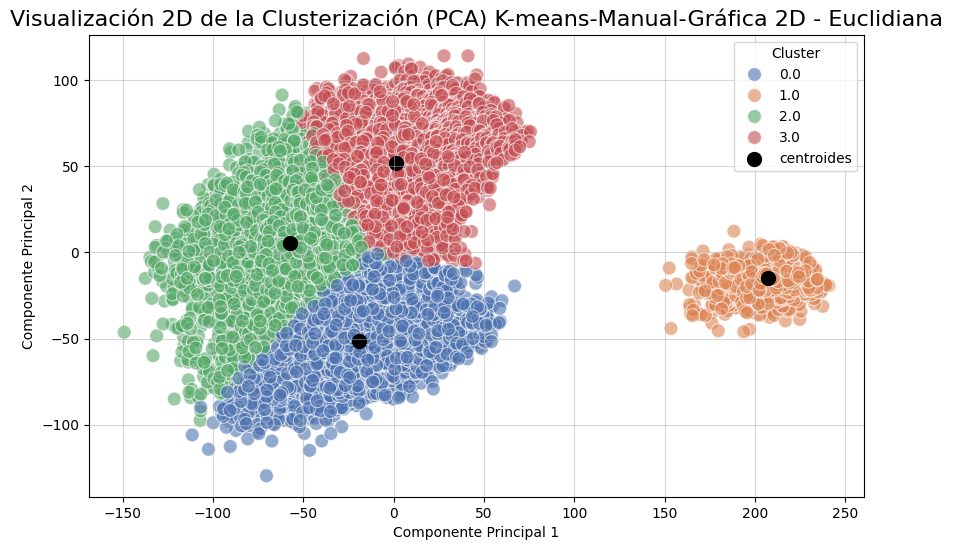

In [ ]:
k_means_sklearn_2D = graficar_clusters_PCA2D(clusters_manuales, 'K-means-Manual-Gráfica 2D - Euclidiana', centroids)

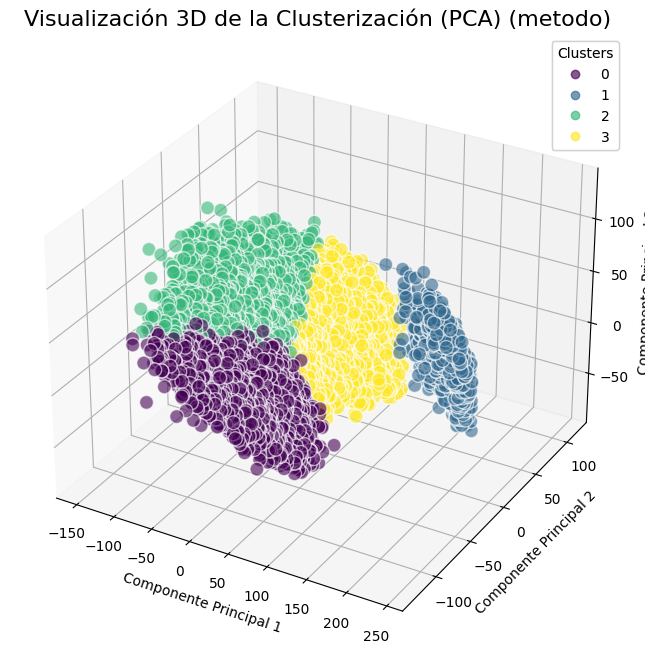

In [ ]:
k_means_sklearn_3D = graficar_clusters_PCA3D(clusters_manuales, 'K-means-Manual-Gráfica 3D- Euclidiana')